# Ce projet fonctionne avec les versions des package suivants:

- matplotlib==3.9.0
- pandas==2.2.2
- seaborn==0.13.2
- missingno==0.5.2

## The Data
This is a dataset of food products listing the ingredients and nutritional facts of more than 300,000 foods from over 150 countries in the world. The data is meant to be free to the public to help users decode food labels, and make better food choices in general. The dataset contains more than 300,000 rows over 163 columns. However, as we will see there are a lot of missing or obviously incorrect values.<br/>
Generalities:

- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language
- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with _serving correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product


# Nettoyer et Filtrer les Features et Produits
## 1.1. Collecter et Préparer les Données Brutes
### 1. Charger les données dans un DataFrame Pandas


In [4]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Collecter et Préparer les Données Brutes
### 1. Charger les données dans un DataFrame Pandas

In [6]:
def init():
    print('Initialisation du projet...', end='\r')
    filepath ='datas/openfoodfacts.csv'
    target ='origins'
    selected = ['countries_fr','origins_tags','nutrition_grade_fr']
    data = pd.read_csv(f"{filepath}", sep="\t", encoding="utf-8", on_bad_lines="skip", low_memory=False)
    print(' '*len('Initialisation du projet...'), end='\r')
    return filepath,target,selected, data

In [7]:
def select_file():
    print("charger le nouveau fichier")
    root =tk.Tk()
    root.withdraw()

    filepath = filedialog.askopenfilename(
        title="Choisissez votre fichier csv",
        filetypes=(("Fichiers CSV","*.csv"), ("Tous les fichiers","*.*"))
    )
    print(' '*len("charger le nouveau fichier"),end='\r')
    print("chargement en cours...")
    root.destroy()

    if filepath:
        try:
            data = pd.read_csv(f"{filepath}", sep="\t", encoding="utf-8", on_bad_lines="skip", low_memory=False)
            print(' '*len("chargement en cours..."),end='\r')
            print(f"Fichier chargé avec succès depuis le chemin: {filepath}")
            return data
        except Exeption as e:
            print("Erreur lors du chargement du fichier:",e)
    else:
        print("Aucun fichier sélectionné.")

In [8]:
filepath, target, selected, data = init()
print(data.shape)

(320772, 162)              


Il s'agit d'un gros dataset de plus de 320 000 ligne et 160 colonnes

In [10]:
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [11]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2. Identifier et Sélectionner les Features Pertinentes
### 1.Lister les Features (Colonnes) :

In [13]:
def feature_list(data):
    features = data.columns
    print(f"Total features:", len(features))
    print(f"Features:", features)


In [14]:
feature_list(data)

Total features: 162
Features: Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)


### 2.Séparer les Features Quantitatives et Qualitatives :

In [16]:
def split_features(data):
    quantitative_features = data.select_dtypes(include=['float64','int64'])
    qualitative_features = data.select_dtypes(include=['object'])
    return quantitative_features,qualitative_features

# print('Quantitative Features\n',quantitative_features.columns )
# print('Qualitative Features\n',qualitative_features.columns )

## 1.3. Choisir une Cible

### 1.Choisir une Feature Cible avec Moins de 50% de Valeurs Présentes :

In [19]:
def target_choice(qualitative_features):
    # Calcule le pourcentage de valeurs manquantes pour chaque colonne
    missing_percentages = data.isnull().mean() *100
    #Filtrer les features ayant moins de 50% de valeurs manquantes.
    features_with_less_than_50_missing = missing_percentages[missing_percentages > 50].index
    potential_targets = [feature for feature in qualitative_features if feature in features_with_less_than_50_missing]

    print(f'{len(potential_targets)} cibles potentiels / {len(qualitative_features.columns)} features. \nSelectionner votre cible dans la liste suivantes :')
    for index, feature in enumerate(potential_targets):
        #num_unique_item = data[feature].nunique()
        nb_fill_each_value= data[feature].count()
        val_null= data[feature].isna().sum()
        percentage_fill_each_value = (nb_fill_each_value / len(qualitative_features) * 100).round(2)
        print(f"{index+1}: {feature}: {percentage_fill_each_value}% des valeurs présentes soit {nb_fill_each_value} valeurs")
        #print(f"{index+1}: {feature}: {num_unique_item} valeurs unique / Pourcentage de valeurs présentes: {percentage_fill_each_value}%")
    try:
        selected_index = int(input('Entrer l\'index de votre cible:'))
        target = potential_targets[selected_index-1]
        print("Feature cible selectionnée:", target)
    except IndexError:
        print("Invalid index. Please restart the selection process.")
    except ValueError:
        print("Invalid input. Please enter a numeric index.")
    return target

In [20]:
#result=data[target].dropna().unique()
#df_result=pd.DataFrame(result, columns=[target])
#print(f'Détail de notre features cibles: {target}')
#df_result

### Supprimer les Lignes (Produits) Sans Valeur Cible :


In [22]:
data[target].isna().sum()

np.int64(298582)

In [23]:
def clean_row_without_target(data,target):
    data_nan = data[data[target].isna()]
    data_cleaned = data.dropna(subset=[target])
    result = data_cleaned.shape
    return data_cleaned
#data_nan.shape

### 3.Séparer la Cible du Reste du Dataset :


In [25]:
def split_dataset_from_target(data_cleaned,target):
    df_without_target = data_cleaned.drop(columns=[target])
    df_with_target=data_cleaned[target]
    return df_without_target

## 1.4. Afficher les Taux de Remplissage des Features

In [27]:
def filling_rate_display(data_cleaned,df_without_target):
    filling_rates = data_cleaned.notnull().mean()*100
    sorted_value=df_without_target.count().sort_values(ascending=True)
    sorted_df =df_without_target[sorted_value.index]
    msno.bar(sorted_df)

## 1.5. Sélectionner des Features Intéressantes

### Sélectionner les Features avec Plus de 50% de Valeurs Présentes :

In [30]:
def select_features_with_more_than_50(df_without_target):
    df_without_target=df_without_target.notnull().mean()*100
    selected_features = df_without_target[df_without_target>50].index
    selected_features = pd.DataFrame(selected_features,columns=['Features'])
    print('Feature ayant plus de 50% de valeurs que vous pouvez selectionner:\n ')
    for index ,row in selected_features.iterrows():
        print(f'{index+1} : {row["Features"]}')
    return selected_features
#selected_features.columns=['Features']

In [31]:
def features_selection(selected,selected_features):
    nb_element = int(input('Combien de feature voulez-vous utiliser (recommandé 3)'))
    print(f'Selectionnez 1 à {nb_element} éléments:\n')
    #first_element = input(f'Entrez le numéro de votre premier choix pour terminer:')
    #first_element = selected_features.iloc(first_element)
    old_selected = selected
    selected = [] # Pour stocker les features choisis
    while len(selected) < nb_element:
        if len(selected)<nb_element:
            choice_index= input(f"Entrez le numéro de votre choix numéro {len(selected)+1} ou tapez fin pour garder le choix initial")
            if choice_index.lower()=='fin':
                if len(selected)==0:
                    selected = old_selected
                else:
                    return selected
            else:
                try:
                    choice_index= int(choice_index)-1
                    if 0<= choice_index <len(selected_features):
                        feature = selected_features.iloc[choice_index]['Features']
                        if feature not in selected:
                            selected.append(feature)
                            print(f'Vous avez selectionné {feature}')
                            print(f'Features selectionnées:{selected}')
                        else:
                            print("Vous avez déjà sélectionné cette feature. Veuillez choisir une autre.")
                    else:
                        print('Numéro de choix invalide, veuillez entrer un numéro valide.')
                except ValueError:
                    print("Entrée invalide, veuillez entrer un numéro entier.")
    return selected

In [32]:
def clean_duplicate(data_cleaned):
    data_cleaned = data_cleaned.drop_duplicates(subset=['code'])
    return data_cleaned

Paramètre par défaut:      

chemin du fichier:
 --> datas/openfoodfacts.csv

Cible de l'analyse:
 --> origins

Features de l'analyse:
 --> ['countries_fr', 'origins_tags', 'nutrition_grade_fr']



Souhaitez-vous changer les paramètres par défault?
 Oui / Non non


Total features: 162
Features: Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)


,code,product_name,url,origins,countries_fr,origins_tags,nutrition_grade_fr
174,0000000290616,Salade Cesar,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,c
175,0000000394710,Danoises à la cannelle roulées,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,NaN
177,0000001071894,Flute,http://world-fr.openfoodfacts.org/produit/0000...,France,Royaume-Uni,france,NaN
180,0000001938067,Chaussons tressés aux pommes,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,c
181,0000004302544,Pain Burger Artisan,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,b
...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,http://world-fr.openfoodfacts.org/produit/9780...,Côte d'Ivoire,France,cote-d-ivoire,NaN
320743,9791463741241,Gingembre,http://world-fr.openfoodfacts.org/produit/9791...,Sri Lanka,France,sri-lanka,NaN
320758,9900010011557,Miel de Camargue,http://world-fr.openfoodfacts.org/produit/9900...,France,France,france,NaN
320761,9906410000009,Roussette du Bugey (2011),http://world-fr.openfoodfacts.org/produit/9906...,"Flaxieu,Bugey,Ain",France,"flaxieu,bugey,ain",NaN


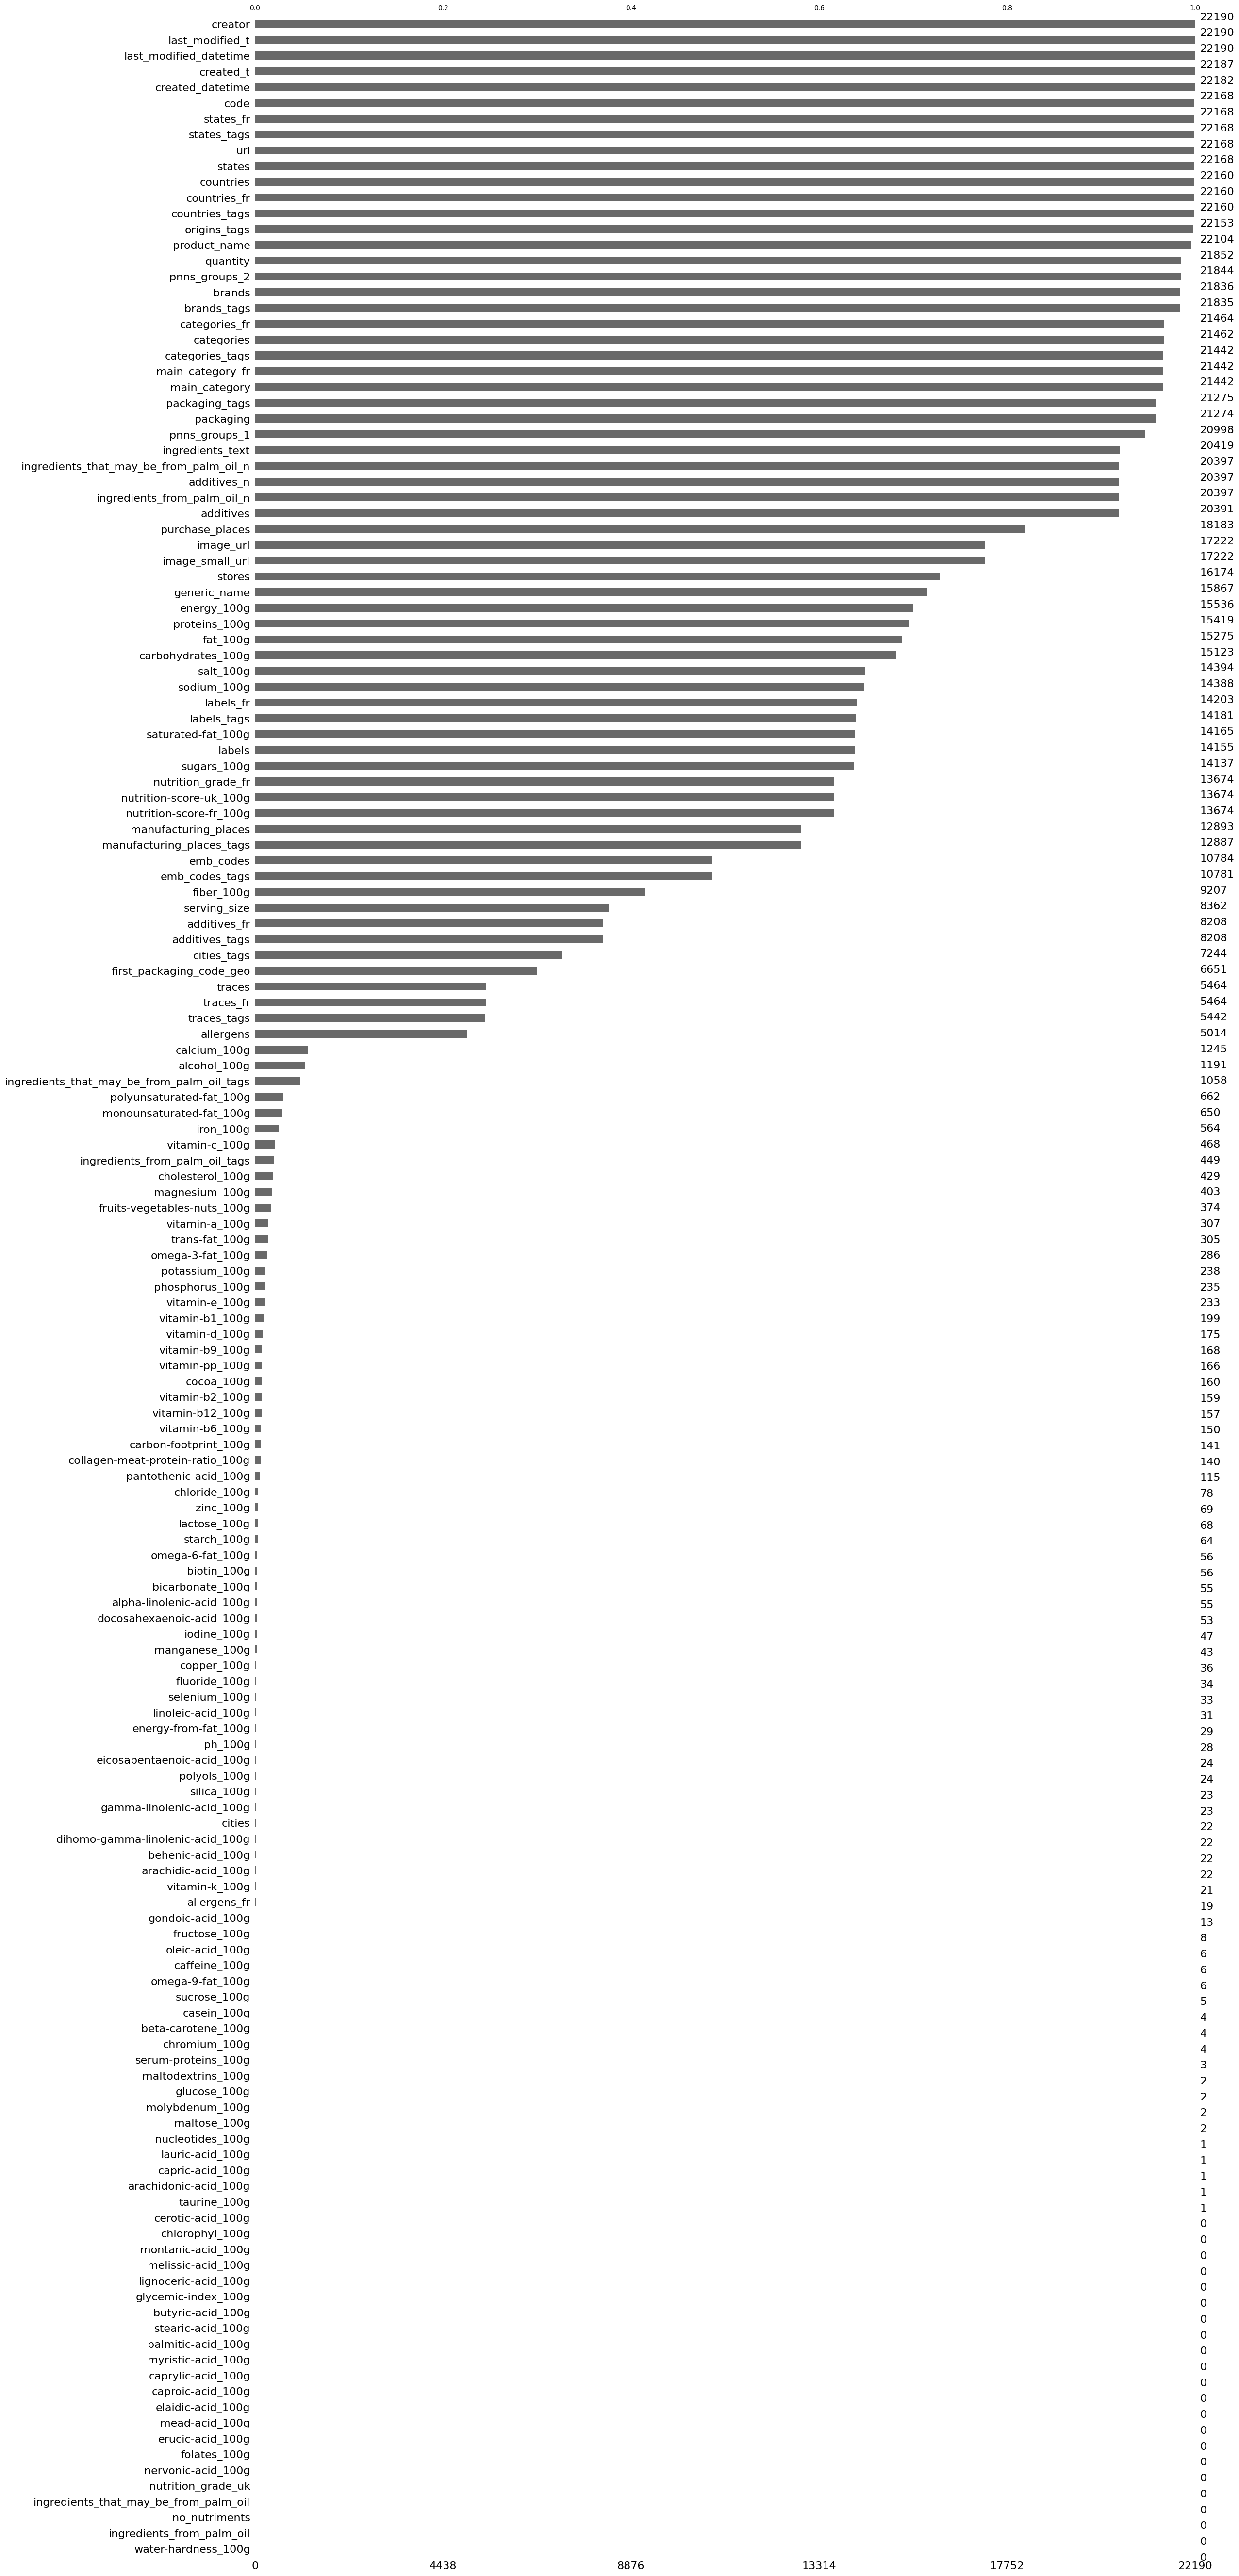

In [160]:
filepath,target,selected, data=init() #initialisation du fichier local avec la première selection de paramètres
print('Paramètre par défaut:\n')
print(f'chemin du fichier:\n --> {filepath}\n')
print(f'Cible de l\'analyse:\n --> {target}\n')
print(f'Features de l\'analyse:\n --> {selected}\n')
default_params=input('Souhaitez-vous changer les paramètres par défault?\n Oui / Non')

if default_params.lower() == "oui":
    
    filepath_params=input('Souhaitez-vous changer de fichier?\n Oui / Non')
    
    if filepath_params.lower()=='oui': # Change le fichier de jeu de données
        data = select_file()  #Fonction de selection du nouveau fichier
        feature_list(data) # Liste des colonnes avec le nouveau ficher
    
    quantitative_features, qualitative_features = split_features(data) #Features avec le nouveau ficher
    target_params=input(f'Souhaitez-vous changer la cible d\'analye? {target}\n Oui / Non')
    if target_params.lower()=='oui':
        target = target_choice(qualitative_features) # Change la cible d'analyse
        data_cleaned = clean_row_without_target(data,target) # Supprime les ligne n'ayant pas de cible
        df_without_target = split_dataset_from_target(data_cleaned,target) #sépare et recupère un dataframe sans la colonne cible
        filling_rate_display(data_cleaned,df_without_target) #Taux de rempissage
        select_features_with_more_than_50(df_without_target)
    
    print(f"cible d'analyse: {target}")
    
    
    selected_params=input(f'Souhaitez-vous changer de Features? actuellement {selected}\n Oui / Non')
    if selected_params.lower()=='oui':
        data_cleaned = clean_row_without_target(data,target) # Supprime les ligne n'ayant pas de cible
        df_without_target = split_dataset_from_target(data_cleaned,target) #sépare et recupère un dataframe sans la colonne cible
        filling_rate_display(data_cleaned,df_without_target) # Affiche taux de remplissage
        selected_features=select_features_with_more_than_50(df_without_target)
        selected =features_selection(selected,selected_features)
        print(f'Nouvelles Features selectionnées:{selected}')
    
else:
    feature_list(data)
    quantitative_features, qualitative_features = split_features(data)
    #print(f'split-----> {qualitative_features}')
    #target_choice(qualitative_features)
    data_cleaned = clean_row_without_target(data,target)
    df_without_target = split_dataset_from_target(data_cleaned,target)
    filling_rate_display(data_cleaned,df_without_target)
    #def cleanAndFilterProductFeatures:


data_clean_duplicate=clean_duplicate(data_cleaned)

columns_to_keep = ['code','product_name','url'] + [target] + selected

# renamed_columns = {col:f'Features_{col}' for col in selected}
# renamed_columns[target] = f'target_{target}'

data_filtered = data_clean_duplicate[columns_to_keep]
# data_filtered = data_filtered.rename(columns=renamed_columns)
data_filtered

In [162]:
data_filtered.shape

(22169, 7)

# Identifier et traitez les valeurs aberrantes

## 1.1. Collecter et Préparer les Données Brutes
### 1. Charger les données dans un DataFrame Pandas


In [164]:
print(target)
print(data_filtered.columns)

origins
Index(['code', 'product_name', 'url', 'origins', 'countries_fr',
       'origins_tags', 'nutrition_grade_fr'],
      dtype='object')


In [166]:
data_filtered

,code,product_name,url,origins,countries_fr,origins_tags,nutrition_grade_fr
174,0000000290616,Salade Cesar,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,c
175,0000000394710,Danoises à la cannelle roulées,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,NaN
177,0000001071894,Flute,http://world-fr.openfoodfacts.org/produit/0000...,France,Royaume-Uni,france,NaN
180,0000001938067,Chaussons tressés aux pommes,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,c
181,0000004302544,Pain Burger Artisan,http://world-fr.openfoodfacts.org/produit/0000...,Québec,Canada,quebec,b
...,...,...,...,...,...,...,...
320736,9780201379129,Attiéké,http://world-fr.openfoodfacts.org/produit/9780...,Côte d'Ivoire,France,cote-d-ivoire,NaN
320743,9791463741241,Gingembre,http://world-fr.openfoodfacts.org/produit/9791...,Sri Lanka,France,sri-lanka,NaN
320758,9900010011557,Miel de Camargue,http://world-fr.openfoodfacts.org/produit/9900...,France,France,france,NaN
320761,9906410000009,Roussette du Bugey (2011),http://world-fr.openfoodfacts.org/produit/9906...,"Flaxieu,Bugey,Ain",France,"flaxieu,bugey,ain",NaN


In [168]:
import matplotlib.font_manager as fm

# plt.rcParams['font.family'] = ['DejaVu Sans', 'Noto Sans CJK JP']

# fm.findSystemFonts(fontpaths=None,fontext='ttf')
# # Spécifiez le chemin vers le fichier de police installé
font_paths = [
    '/Users/yann/FromNas/Training/IA Engineer/P3_santePublique/dejavu-fonts-ttf-2.37/ttf/DejaVuSans.ttf',  # DejaVu Sans
    '/Users/yann/Library/Fonts/NotoSansCJK.ttc',  # Noto Sans CJK pour les caractères chinois, japonais et coréens
    '/Users/yann/Library/Fonts/NotoSansThai-VariableFont_wdth,wght.ttf'
]
font_props = [fm.FontProperties(fname=font_path) for font_path in font_paths]
plt.rcParams['font.family'] = [fp.get_name() for fp in font_props]
def clean_text(text):
    return ''.join([char if ord(char)>=32 else '' for char in text])


# # Afficher le nom de la police reconnue par Matplotlib
# print("Nom de la police :", font_prop.get_name())
# plt.rcParams['font.family'] = font_prop.get_name()

In [170]:
data_filtered[target].nunique()

4819

In [ ]:
# quantitative_features, qualitative_features = split_features(data)

# quantitative_features

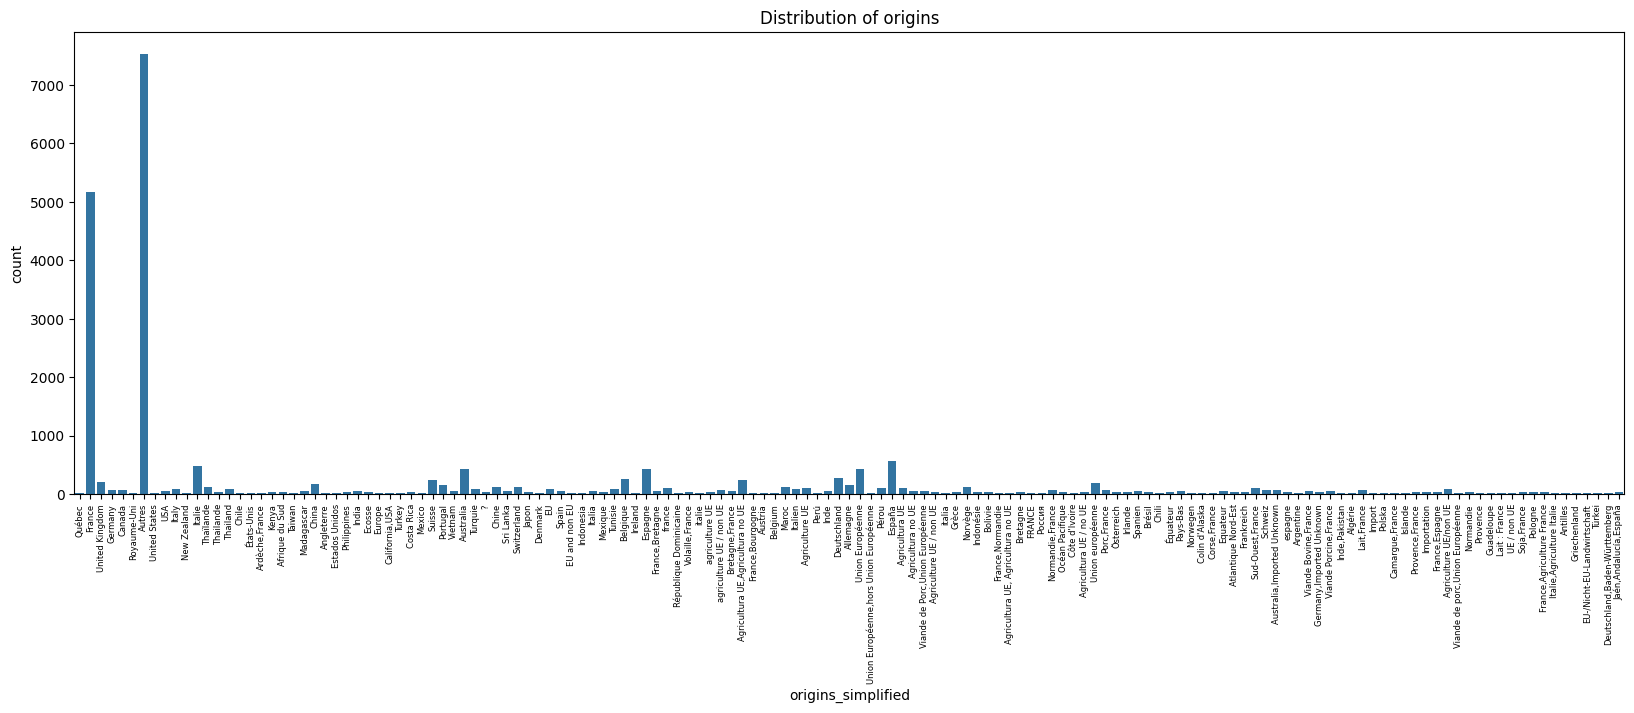

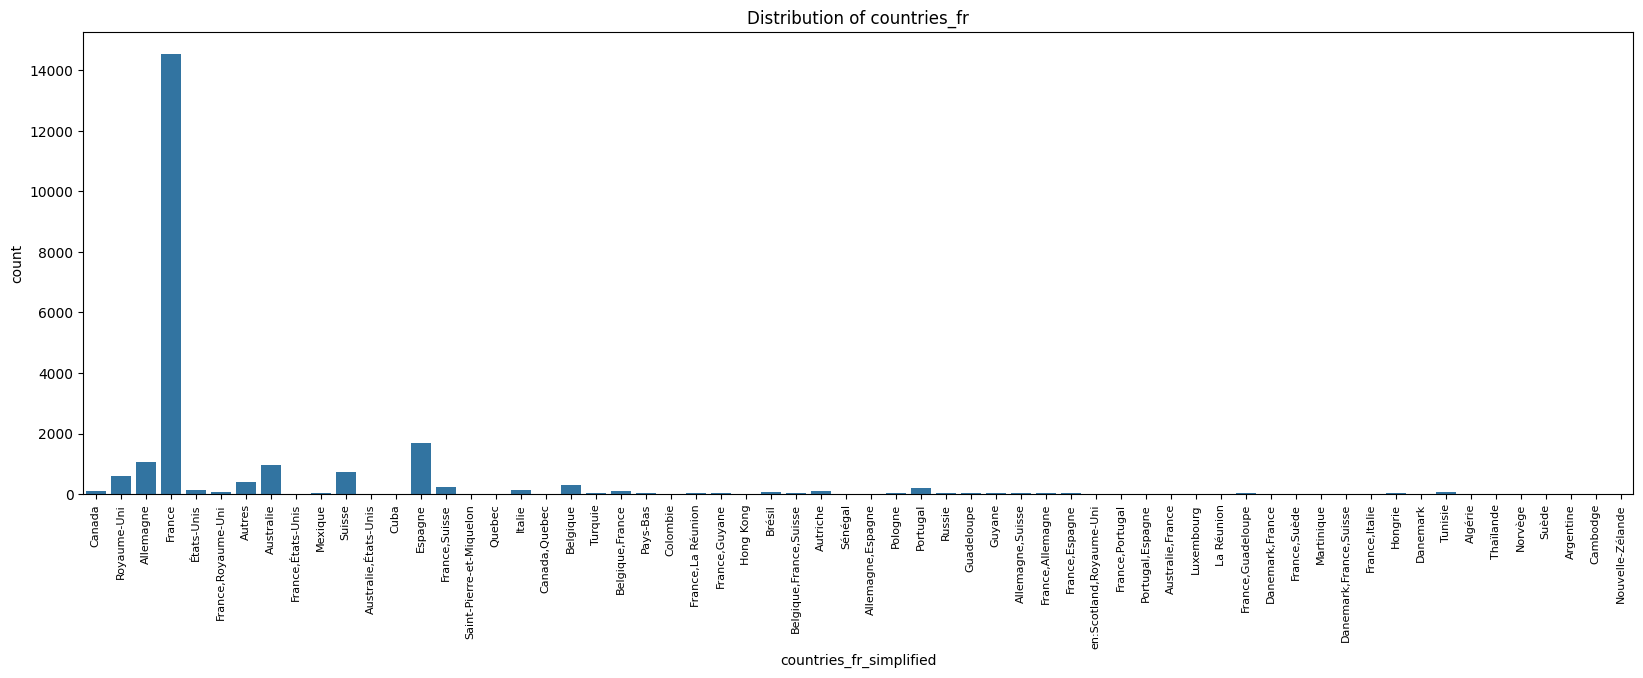

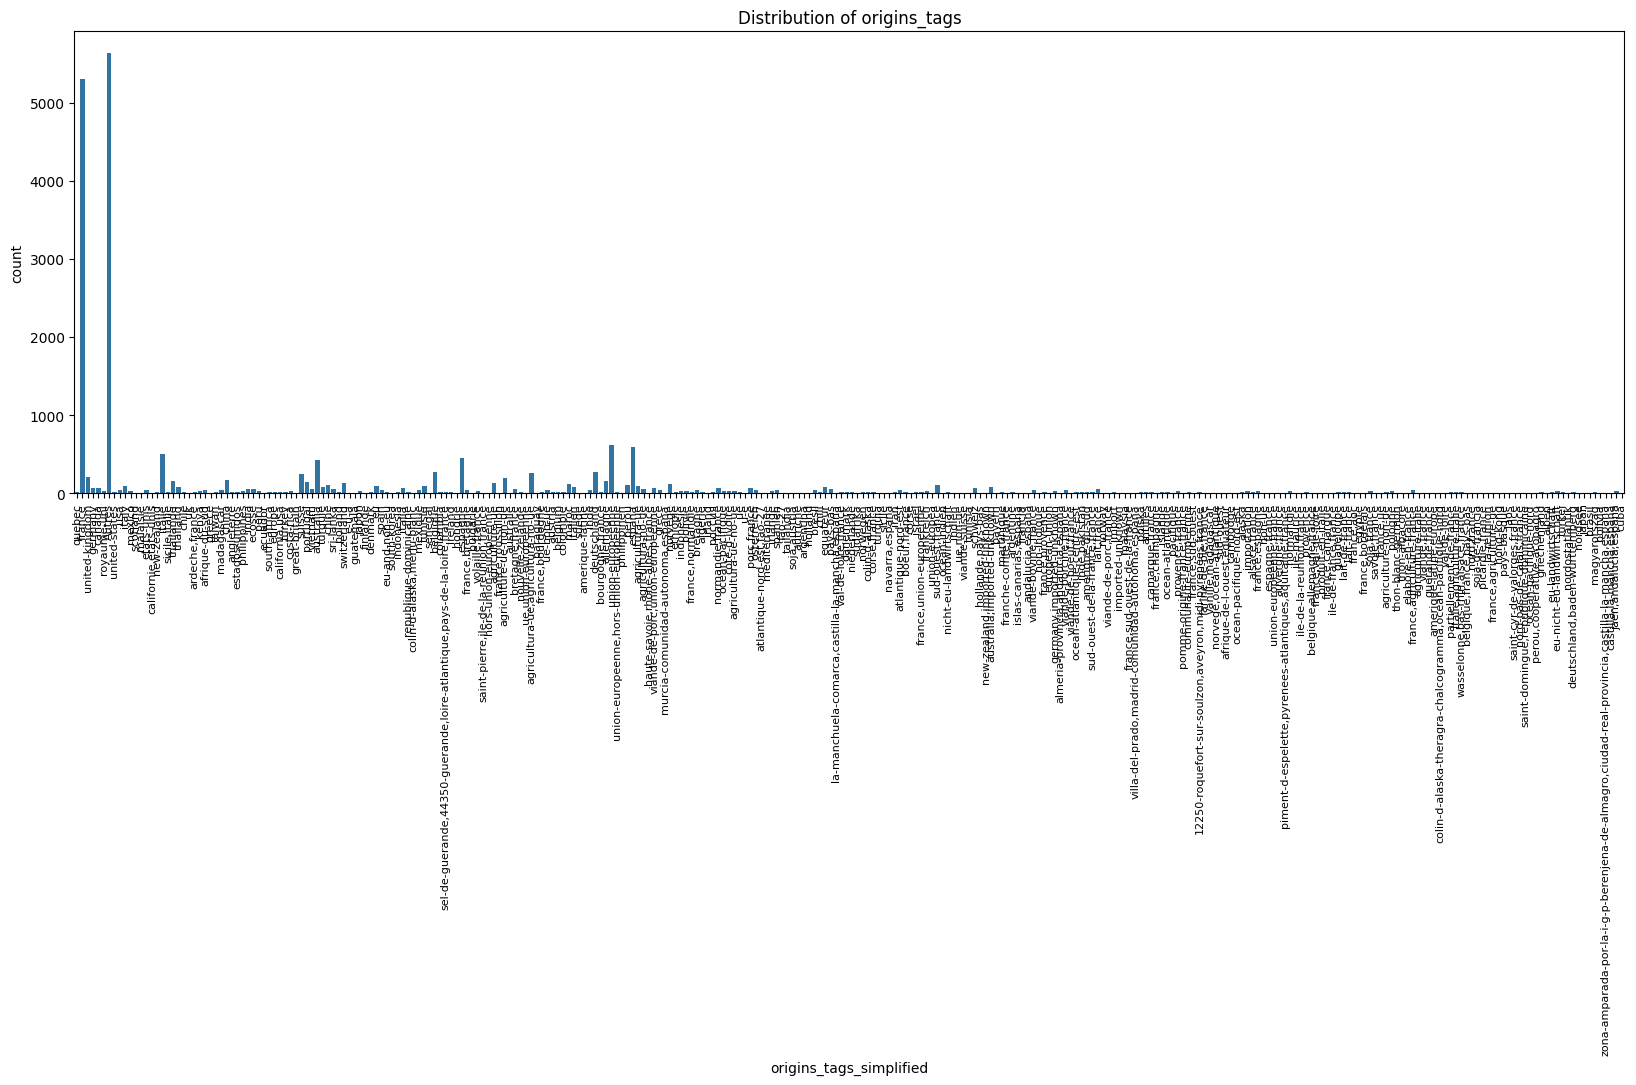

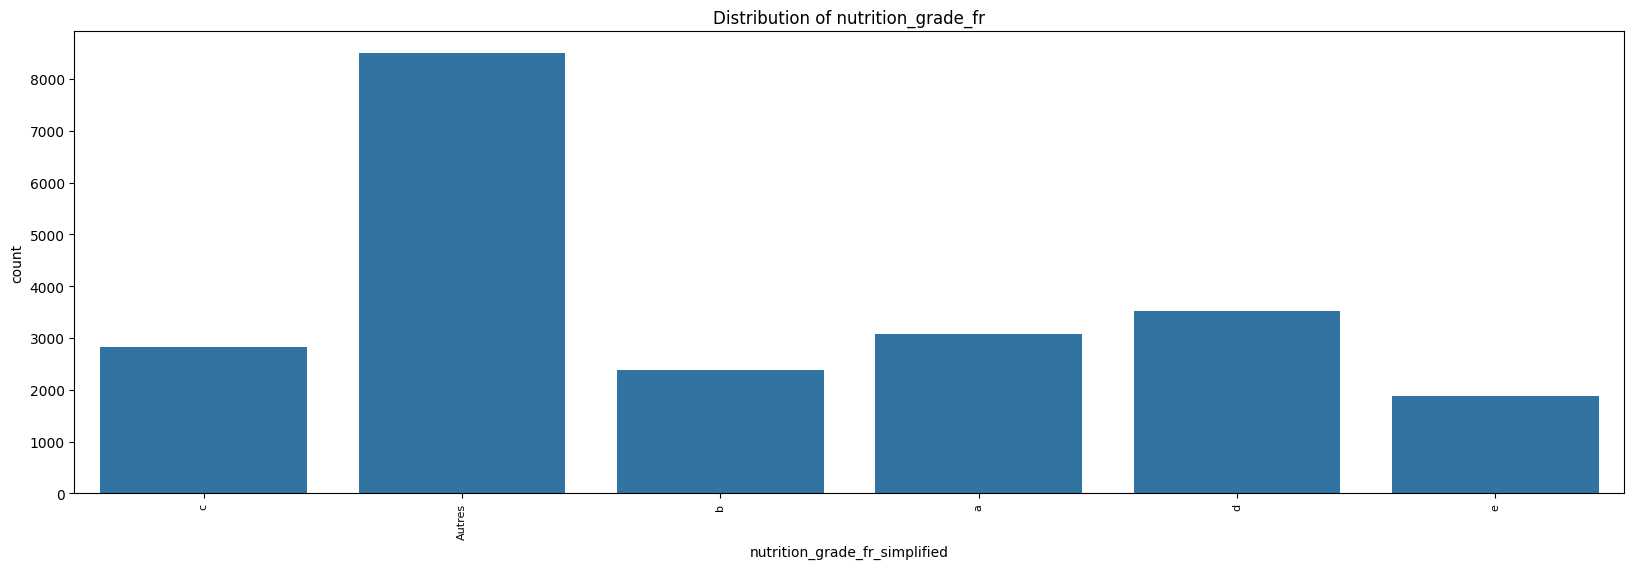

In [190]:
# data_filtered_cleaned = data_filtered.map(lambda x: clean_text(x) if isinstance(x, str) else x)
quantitative_features, qualitative_features = split_features(data_filtered)
threshold = 6
threshold_target = 15

value_counts_target = data_filtered[target].value_counts()
to_keep_target = value_counts_target[value_counts_target>threshold_target].index
data_filtered = data_filtered.copy()
data_filtered[f'{target}_simplified'] = data_filtered[target].apply(lambda x: x if x in to_keep_target else 'Autres')

plt.figure(figsize=(20, 6))

if data_filtered[target].nunique()<20:
    fig, ax =plt.subplots(figsize=(16,14))
    counts = data_filtered[target].value_counts()  # Comptez les occurrences de chaque catégorie
    ax.pie(counts, labels=None, autopct='%1.1f%%',  textprops={'size': 'smaller'},pctdistance=1.1)
    ax.legend(wedges, counts.index, title=target, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.axis('equal')
    plt.title(f'Distribution of {target}')
    plt.show()
    
else:
    sns.countplot(x=f'{target}_simplified', data=data_filtered)
    plt.title(f'Distribution of {target}')
    plt.xticks(rotation=90, fontsize=6)
    plt.show()    
    

for feat in selected:
    
    if feat in qualitative_features.columns:
        value_counts = data_filtered[feat].value_counts()
        to_keep = value_counts[value_counts>threshold].index
        data_filtered.loc[:,f'{feat}_simplified']=data_filtered[feat].apply(lambda x:x if x in to_keep else 'Autres')
        # print(f'{feat} is in')
        plt.figure(figsize=(20, 6))
        sns.countplot(x=f'{feat}_simplified', data=data_filtered)
        plt.title(f'Distribution of {feat}')
        plt.xticks(rotation=90, fontsize=8)
        plt.show()
        # plt.tight_layout()
    else:
        plt.figure(figsize=(20, 6))
        sns.scatterplot( y=feat, x=f'{target}_simplified', data=data_filtered)
        plt.title(f'Distribution of {target}_simplified vs {feat}')
        plt.xticks(rotation=90, fontsize=6)
        plt.show()

In [ ]:
result=data_filtered['product_name'].nunique()
result

In [ ]:
r= data_filtered['origins_tags'].unique()